In [1]:
!pip install yfinance pandas numpy scikit-learn matplotlib mplcursors


In [2]:
!pip install yfinance --upgrade --no-cache-dir

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Data berhasil diambil!
Jumlah elemen all_dates: 706
Jumlah elemen all_predictions: 706


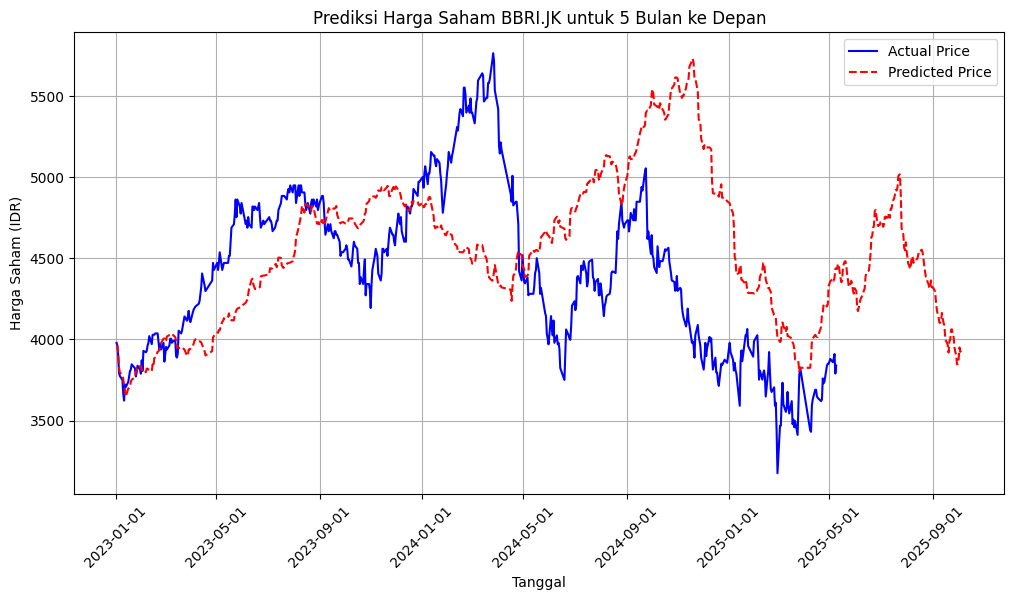

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta

# 1 Pilih saham & periode data
ticker = "BBRI.JK"  # Ganti dengan kode saham lain jika perlu
start_date = "2023-01-01"
end_date = "2025-05-10"

# 2️ Download data saham
data = yf.download(ticker, start=start_date, end=end_date).dropna()  # Hapus missing values

# Cek apakah data tersedia
if data.empty:
    print("Data tidak tersedia.")
    exit()
else:
    print("Data berhasil diambil!")

# 3️ Siapkan data untuk model
data.reset_index(inplace=True)
data['Day'] = (data['Date'] - data['Date'].min()).dt.days  # Konversi tanggal ke angka

X = data[['Day']]
y = data['Close']

# 4️ Latih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 5️ Buat prediksi dari awal dataset sampai **5 bulan ke depan (150 hari)**
last_day = X['Day'].max()
future_days = np.array([i for i in range(last_day + 1, last_day + 151)]).reshape(-1, 1)
future_dates = [data['Date'].max() + timedelta(days=i) for i in range(1, 151)]

# Gabungkan semua hari untuk prediksi dari awal hingga ke depan
all_days = np.array([i for i in range(X['Day'].min(), last_day + 151)]).reshape(-1, 1)
all_dates = list(data['Date']) + future_dates

# **Prediksi harga saham**
all_predictions = model.predict(all_days)

#  Pastikan jumlah elemen sama
min_length = min(len(all_dates), len(all_predictions))
all_dates = all_dates[:min_length]
all_predictions = all_predictions[:min_length]

# Debugging jumlah elemen
print(f"Jumlah elemen all_dates: {len(all_dates)}")
print(f"Jumlah elemen all_predictions: {len(all_predictions)}")

# 6️ Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))

# Plot data asli
plt.plot(data['Date'], data['Close'], label="Actual Price", color='blue')

# Plot prediksi dari awal dataset sampai **5 bulan ke depan**
plt.plot(all_dates, all_predictions, label="Predicted Price", color='red', linestyle='dashed')

# Format sumbu X
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham (IDR)")
plt.title(f"Prediksi Harga Saham {ticker} untuk 5 Bulan ke Depan")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.grid()
plt.show()
